# Домашнее задание

### Подберите параметры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.

#### Имортируем необходимые модули

In [105]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Загружаем изображение

In [106]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Выведем исходное изображение на экран

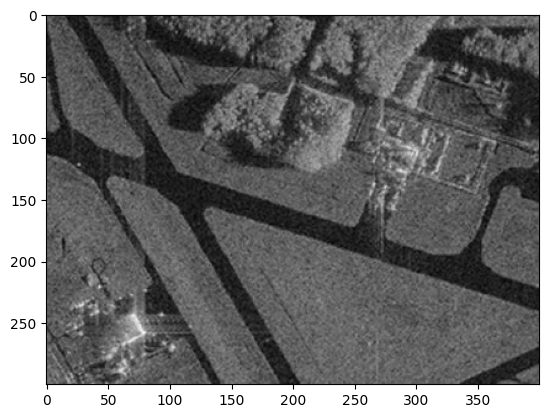

In [107]:
plt.imshow(image_gray, cmap="gray")

#### Реализация алгоритма расрастания регионов

In [108]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
    if abs(av_val - img[point]) <= T:
        return True
    return False
     
def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r:j +
                r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
    return mask * 255
     

#### Устанавливаем seed point и применяем алгоритм

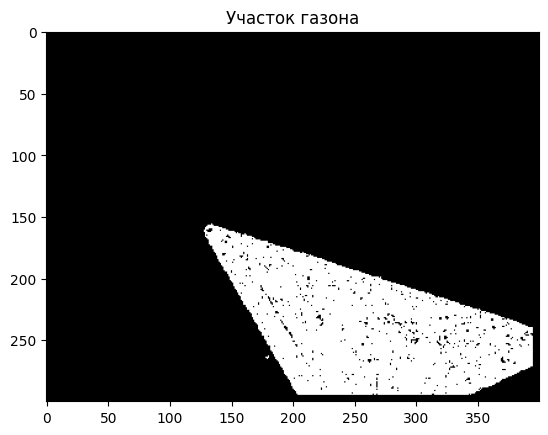

In [109]:
seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_average, 5, 18)


plt.imshow(mask, cmap="gray")
plt.title("Участок газона")
plt.show()

#### Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.


In [110]:
def apply_kmeans(image, K):
    z = image.reshape((-1, 1))  
    z = np.float32(z)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv2.kmeans(z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((image.shape))
    return res2

(np.float64(-0.5), np.float64(399.5), np.float64(299.5), np.float64(-0.5))

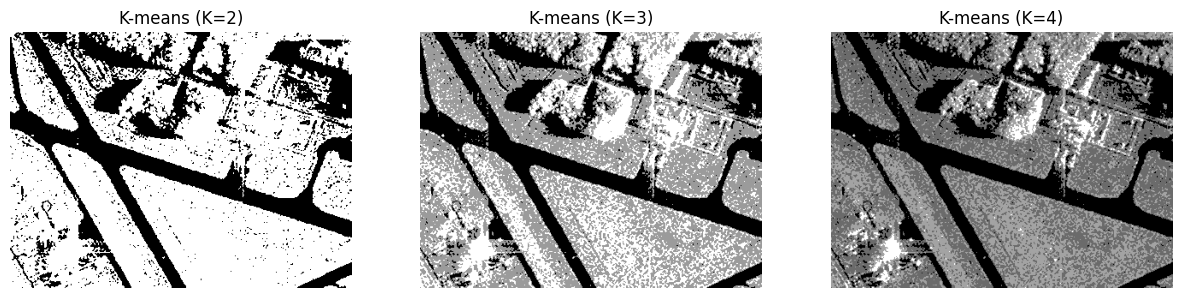

In [111]:
k2_result = apply_kmeans(image_gray, 2)
k3_result = apply_kmeans(image_gray, 3)
k4_result = apply_kmeans(image_gray, 4)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(k2_result, cmap='gray')
axes[0].set_title('K-means (K=2)')
axes[0].axis('off')

axes[1].imshow(k3_result, cmap='gray')
axes[1].set_title('K-means (K=3)')
axes[1].axis('off')

axes[2].imshow(k4_result, cmap='gray')
axes[2].set_title('K-means (K=4)')
axes[2].axis('off')

### Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

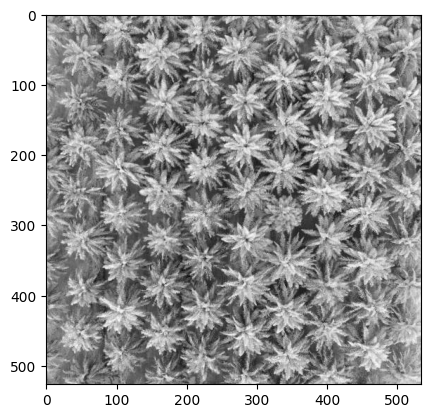

In [121]:
image1 = cv2.imread('palm_1.jpg')
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(image_gray1, (5,5), 0)

plt.imshow(image_gray1, cmap="gray")

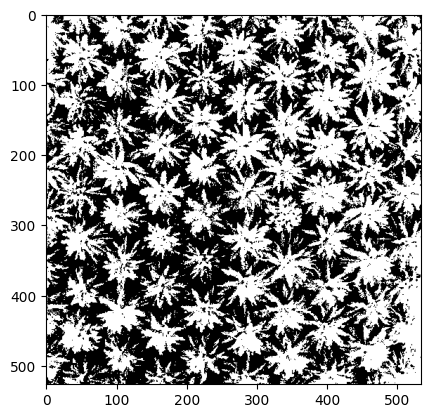

In [122]:
ret, thresh = cv2.threshold(image_gray1,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

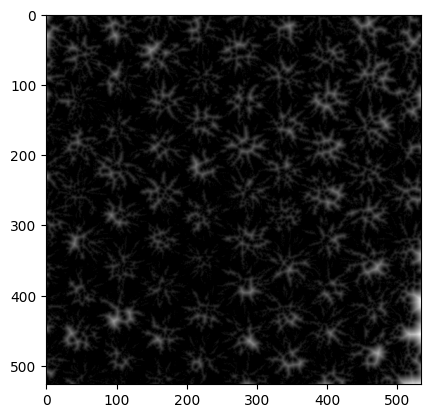

In [123]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist, cmap="gray")

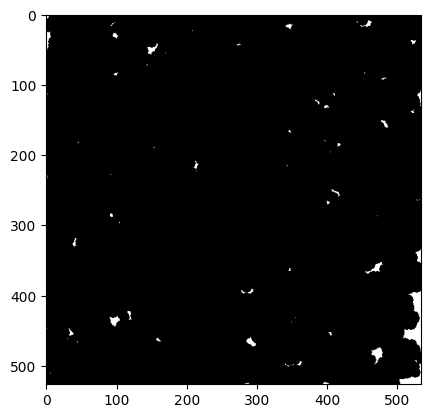

In [124]:
ret, sure_fg = cv2.threshold(dist, 0.37 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap="gray")

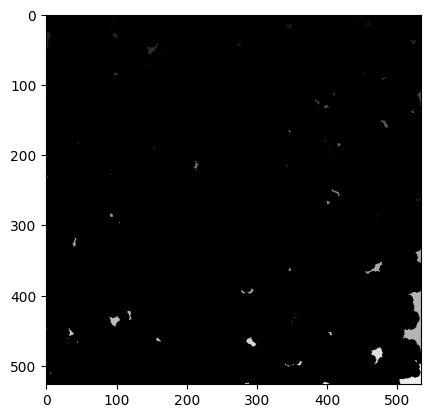

In [125]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap="gray")

Примерное количество пальм: 73


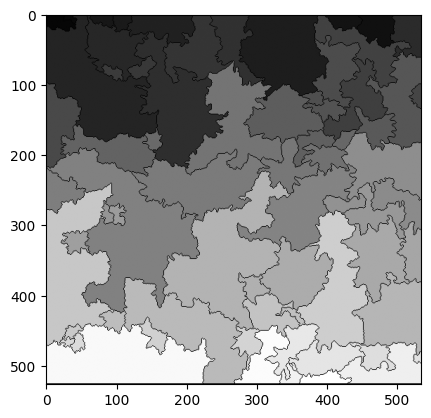

In [126]:
markers = cv2.watershed(image1, markers)
plt.imshow(markers, cmap="gray")
print('Примерное количество пальм:', len(np.unique(markers)))